# Spapros Tutorial: Basic Evaluation

This tutorial shows how to to evaluate a probeset with the spapros evaluation pipeline.
We examplary evaluate the probeset of 50 genes that was selected in our [basic selection tutoral](https://spapros.readthedocs.io/en/latest/tutorials/spapros_tutorial_basic_selection.html).

The used dataset contains 3k PBMCs from a healthy donor and is publicly available from
[10x Genomics](https://support.10xgenomics.com/single-cell-gene-expression/datasets/1.1.0/pbmc3k)
[here](http://cf.10xgenomics.com/samples/cell-exp/1.1.0/pbmc3k/pbmc3k_filtered_gene_bc_matrices.tar.gz).
You can also derive it from scanpy [here](https://scanpy.readthedocs.io/en/stable/generated/scanpy.datasets.pbmc3k.html#scanpy.datasets.pbmc3k), like we will do in this tutorial.

The preprocessed Anndata consists of log-normalized single cell RNAseq counts of 2638 cells for 13714 genes.

## Import packages and setup

To run the notebook locally, create a conda environment using this [environment.yaml](TODO link):

    conda create -f environment.yaml

Then add the conda environment as ipython kernel:

    python -m ipykernel install --user --name spapros --display-name Python (spapros)



In [1]:
import spapros
from spapros import ev, pl
import scanpy as sc
import matplotlib as mpl

In [2]:
sc.settings.verbosity = 1
sc.logging.print_header()
print(f"spapros=={spapros.__version__}")

scanpy==1.8.1 anndata==0.7.8 umap==0.5.2 numpy==1.21.4 scipy==1.7.2 pandas==1.3.4 scikit-learn==1.0.1 statsmodels==0.13.1 python-igraph==0.9.8 pynndescent==0.5.5
spapros==0.1.0


## Load dataset and selected probeset

In [3]:
adata = sc.datasets.pbmc3k()
adata_tmp = sc.datasets.pbmc3k_processed()
adata = adata[adata_tmp.obs_names,adata_tmp.var_names]
adata_raw = adata.copy()
sc.pp.normalize_total(adata,target_sum=1e4,key_added="size_factors")
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata,flavor="cell_ranger",n_top_genes=1000)
adata.X = adata_raw.X
adata.obs['celltype'] = adata_tmp.obs['louvain']
adata

/home/st/strasserl/anaconda3/envs/spapros/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


AnnData object with n_obs × n_vars = 2638 × 1838
    obs: 'size_factors', 'celltype'
    var: 'gene_ids', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

In [4]:
selection = ['PPBP', 'HLA-DQA1', 'FCGR3A', 'GZMB', 'CD79A', 'NKG7', 'S100A8', 'CD2',
       'HLA-DPB1', 'GZMK', 'LST1', 'TYROBP', 'MS4A1', 'GPX1', 'CCL5',
       'HLA-DRB1', 'GNLY', 'FCN1', 'SDPR', 'AIF1', 'FCER1G', 'IGJ', 'CST3',
       'LGALS2', 'GZMA', 'PRF1', 'HIST1H2AC', 'FCER1A', 'STK17A', 'HLA-DQB1',
       'CST7', 'SNRPB', 'LINC00926', 'HLA-DPA1', 'MS4A6A', 'UBE2L6', 'ATP6V1F',
       'SF3B5', 'FYB', 'C9orf142', 'APOBEC3A', 'IGLL5', 'NPC2', 'GRN', 'LYAR',
       'PYCARD', 'LGALS1', 'PF4', 'PTCRA', 'IFITM3']

## Start the evaluation

In [5]:
evaluator = ev.ProbesetEvaluator(adata, verbosity=1, dir=None)

In [6]:
evaluator.evaluate_probeset(selection)

## Visualize the results

In [7]:
mpl.rcParams['figure.dpi'] = 60

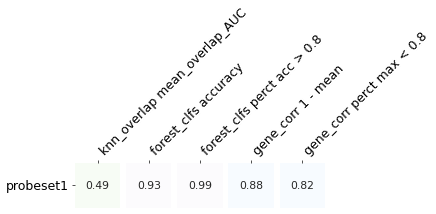

In [8]:
evaluator.plot_summary()

## What's next?

You learned so far the very basic spapros evaluation probeset pipeline.
There are several ways to customize and improve your evaluation with spapros.
See our [advanced evaluation tutorial](https://spapros.readthedocs.io/en/latest/tutorials/spapros_tutorial_advanced_evaluation.html) if you want to learn more.
We also explain each available metric there (there are even more than shown here!) and show how to create pretty plots.

**Note**:
After running this tutorial, the results are stored in a directory, that is by default called `probeset_evaluation`.
If you run another evaluation after this tutorial, be careful that you either specify another dir or delete the previously created results directory because otherwise parts will be overwritten and parts will be falsely reused!
If you do not want to save results, initialize the `ProbesetEvaluator` with `dir=None`.